<a href="https://colab.research.google.com/github/SiddharthXXIII/EE6332-Modeling-and-Optimization-in-VLSI/blob/main/verilog_parser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/MO_VLSI_FILES
with open('c432.txt', 'r') as f:
    contents = f.readlines()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/MO_VLSI_FILES


In [ ]:
temp_lines = []
lines = []
inputs = []
outputs = []
wires = []
fan_out = {}
result = " ".join(line.strip() for line in contents)
result = result.split(";")
for i in range(1,len(result)):
  temp_lines.append(result[i])

for line in temp_lines:
    line = line.strip().replace(" (", " ").replace(")", "").replace(", ", " ").replace(",", " ").split(" ")
    lines.append(line)
temp_lines.clear()

temp_gates = []
temp_fanouts = []
for i in lines:
    if i[0] == 'input':
        for j in i[1:]:
            inputs.append(j)
    if i[0] == 'output':
        for j in i[1:]:
            outputs.append(j)
    if i[0] == 'wire':
        for j in i[1:]:
            wires.append(j)

for j in wires+outputs:
    for i in lines:
        if i[0] in ['not','nand','nor','and','or','xor','xnor']:
            try:
                #print(i.index(j),j,i)
                if(i.index(j) == 2):
                    temp_gates.append(i[1])
                else:
                    temp_fanouts.append(i[1])
            except:
                pass
            else:
                pass
    try:
        x = temp_gates[0]
        fan_out[x] = temp_fanouts[::]
    except:
        x = j
        fan_out[x] = temp_fanouts[::]
        pass
    else:
        pass
    temp_gates.clear()
    temp_fanouts.clear()

for keys,values in fan_out.items():
    print('For input/gate', keys, 'the fanouts are', values)

For input/gate N1 the fanouts are ['NOT1_1', 'NAND2_82']
For input/gate N4 the fanouts are ['NOT1_2', 'NAND4_21', 'NAND2_49']
For input/gate N8 the fanouts are ['NOR2_50', 'NAND2_125']
For input/gate N11 the fanouts are ['NOT1_51', 'NAND2_83']
For input/gate N14 the fanouts are ['NAND2_11', 'NOR2_52']
For input/gate N17 the fanouts are ['NAND4_22', 'NAND2_53', 'NOT1_62']
For input/gate N21 the fanouts are ['NOR2_61', 'NAND2_126']
For input/gate N24 the fanouts are ['NOT1_73', 'NAND2_85']
For input/gate N27 the fanouts are ['NAND2_12', 'NOR2_63']
For input/gate N30 the fanouts are ['NAND4_23', 'NAND2_54', 'NOT1_84']
For input/gate N34 the fanouts are ['NOR2_64', 'NAND2_127']
For input/gate N37 the fanouts are ['NAND2_86', 'NOT1_95']
For input/gate N40 the fanouts are ['NAND2_13', 'NOR2_65']
For input/gate N43 the fanouts are ['NAND4_24', 'NAND2_55', 'NOT1_106']
For input/gate N47 the fanouts are ['NOR2_66', 'NAND2_129']
For input/gate N50 the fanouts are ['NAND2_87', 'NOT1_117']
For inp

In [ ]:

#print(temp_gates)
#print(inputs)
#print(outputs)
#print(wires)

['N50', 'N134', 'N168', 'n_40', 'n_64', 'n_65', 'N199', 'N203', 'n_35', 'n_47', 'n_52', 'N243', 'N279', 'n_30', 'n_31', 'n_32', 'N296', 'N309', 'n_2', 'n_13', 'n_19', 'N333', 'N351', 'n_66', 'N357', 'N360', 'N374', 'N393', 'N417', 'N422', 'N430']
30


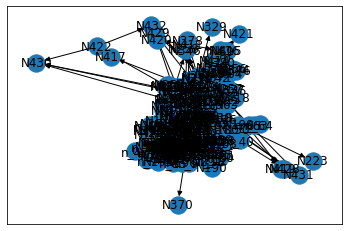

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

graph = nx.DiGraph()

for input in inputs:
    graph.add_node(input)

for output in outputs:
    graph.add_node(output)

for wire in wires:
    graph.add_node(wire)

for i in lines:
    if i[0] in ['not','nand','nor','and','or','xor','xnor']:
        input_nodes = i[3:]
        output_node = i[2]
        for input_node in input_nodes:
            graph.add_edge(input_node, output_node)


nx.topological_sort(graph)
print(nx.dag_longest_path(graph))
print(nx.dag_longest_path_length(graph))
nx.draw_networkx(graph)
plt.show()